In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("./data_arrhythmia.csv", delimiter=";")

In [66]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [67]:
#Some of the columns have only one value so we will classify them as no info
no_info_cols = []
num_cols = df.shape[1]
for index in range(num_cols):
    if len(df.iloc[:,index].unique()) == 1:
        no_info_cols.append(df.columns[index])
no_info_cols

["S'_wave",
 'CB',
 'CD',
 'CS',
 'EV',
 'EY',
 'FF',
 'FH',
 'FJ',
 'FL',
 'FS',
 'FZ',
 'GA',
 'GH',
 'IB',
 'KP',
 'LC']

Histogram for age:


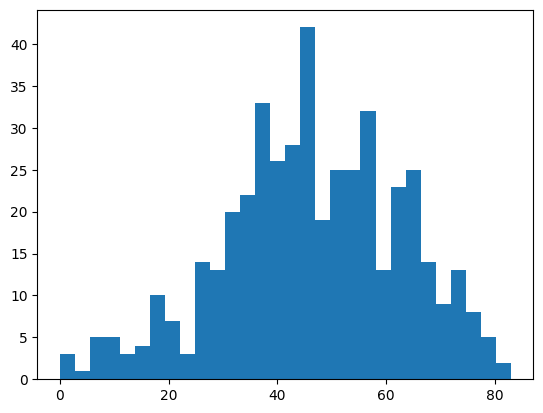

Histogram for sex:


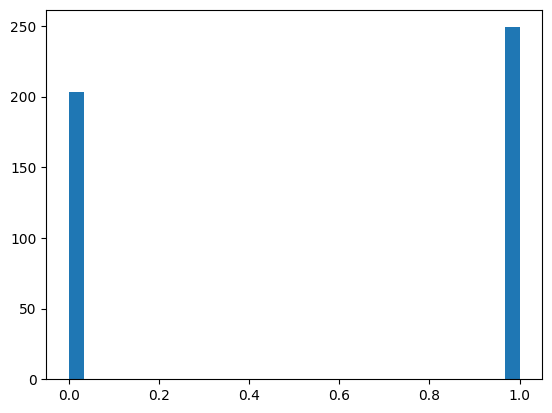

Histogram for height:


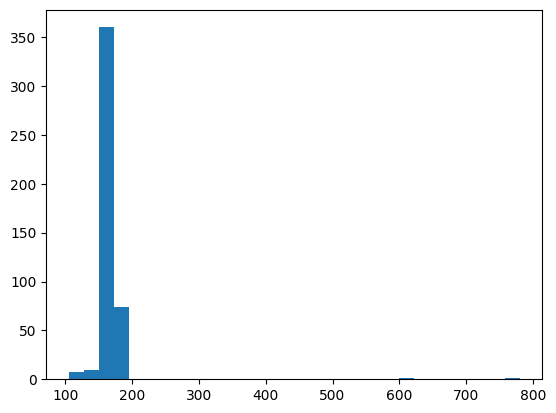

Histogram for weight:


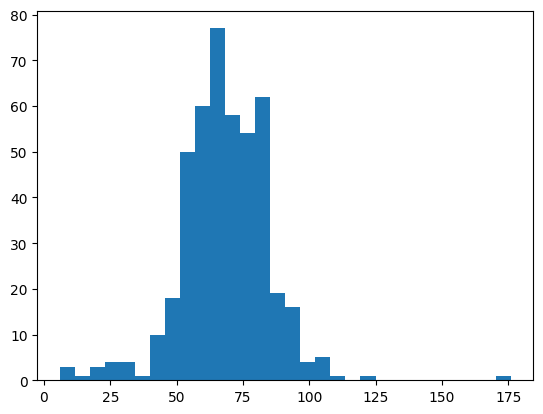

Histogram for heart_rate:


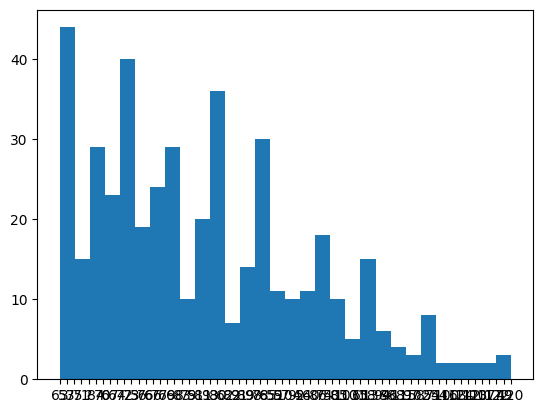

In [68]:
#plot familiar features to see any out of the ordinary data
familiar_features = ['age','sex','height','weight','heart_rate']

def print_hist(df,feature,nbins):
    print("Histogram for " + feature + ":")
    column = df[feature]
    plt.hist(column,bins=nbins)
    plt.show()

for i in familiar_features: print_hist(df, i, 30)
    

In [69]:
#now we will look at some data that I know about to see if an errors in data
df['age'].value_counts().sort_index()

age
0     1
1     2
3     1
7     3
8     2
     ..
78    2
79    1
80    2
81    1
83    1
Name: count, Length: 77, dtype: int64

In [70]:
#Check out the age 0 - update, rounded down value not typo
df[df['age'] == 0]

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
316,0,0,608,10,83,126,232,128,60,125,...,-0.7,4.5,-5.5,0.0,0,0.5,2.5,-11.8,1.7,5


In [71]:
#height seems to be wrong, and age 0 and weight 10kg suggest missing decimal point for 60.8
#changing value of height to 61 cm
df.loc[df['age'] == 0, 'height'] = 61

In [72]:
#height
df['height'].value_counts().sort_index()

height
61      1
105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
780     1
Name: count, dtype: int64

In [73]:
df[df['height'] == 780]

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
141,1,1,780,6,85,165,237,150,106,88,...,0.0,5.0,-4.6,0.0,0,1.3,0.7,2.7,5.5,5


In [74]:
#age 1 weight 6 suggest height to be 78 cm rather than 780
df.loc[df['height'] == 780, 'height'] = 78

In [75]:
df['weight'].value_counts().sort_index()

weight
6      1
10     2
12     1
18     1
21     1
      ..
105    2
106    1
110    1
124    1
176    1
Name: count, Length: 76, dtype: int64

In [76]:
#176 might be typo, we check it out - update, resonable
df[df['weight'] == 176]

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
213,53,0,169,176,111,166,339,200,100,86,...,-1.0,12.4,0.0,0.0,0,0.8,1.5,31.0,44.2,2


In [77]:
df1 = df.copy()
df1 = df.drop(columns=no_info_cols)
df1.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,7


In [78]:
#total missing data
df1.isin(['?']).sum().sum()

408

In [79]:
#see columns with missing data
missing = df1.isin(['?']).sum()
missing_df = pd.DataFrame(missing)
missing_df[missing_df[0] != 0]

,0
T,8
P,22
QRST,1
J,376
heart_rate,1


In [80]:
#since majority of missing values are in J we will drop those values
df2 = df1.copy()
df2 = df1.drop(columns=['J'])
df2.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,7


In [81]:
from sklearn.impute import SimpleImputer
#wasn't registering ? as NaN had to replace
df2 = df2.replace('?', np.nan)
#changing all of the NaN to median values
df3 = df2.copy()
X_df = df3.loc[:,df3.columns != 'diagnosis']
X = np.array(X_df)
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(X)
X_imp = imp.transform(X)
X_imp = pd.DataFrame(X_imp)
#check to see if there are any NaN left
np.isnan(X_imp).sum().sum()

0

In [82]:
y = df2[df2.columns[-1]]
print(X.shape)
print(y.shape)


(452, 261)
(452,)


In [83]:
from sklearn.model_selection import train_test_split

X_train_with_all, X_test_with_all, y_train_with_all, y_test_with_all = train_test_split(X_imp, y, test_size=.2, random_state = 0)

print(X_train_with_all.shape)
print(X_test_with_all.shape)
print(y_train_with_all.shape)
print(y_test_with_all.shape)


(361, 261)
(91, 261)
(361,)
(91,)


In [84]:
#creating training data set without type 1 and 2, normal and class 2 of arrhythmia

type_1 = set(y_train_with_all[y_train_with_all == 1].index)
type_2 = set(y_train_with_all[y_train_with_all != 2].index)
type_1_2 = type_2 - type_1
X_train_without_all = X_train_with_all.copy()
X_train_without_all = X_train_with_all.drop(type_1_2)
y_train_without_all = y_train_with_all.copy
y_train_without_all = y_train_with_all.drop(type_1_2)

X_train_without_all.head()

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
74,35.0,1.0,158.0,60.0,87.0,138.0,383.0,178.0,68.0,61.0,...,88.6,-0.2,0.0,11.2,0.0,0.0,0.4,3.5,29.1,60.6
122,72.0,0.0,170.0,74.0,90.0,180.0,386.0,174.0,100.0,-46.0,...,12.6,0.3,0.0,4.2,-5.8,0.0,0.8,1.3,-1.2,8.4
159,46.0,1.0,153.0,70.0,84.0,153.0,383.0,181.0,86.0,-14.0,...,19.6,-0.1,0.0,6.6,-2.0,0.0,0.3,1.5,9.7,22.9
249,46.0,1.0,165.0,60.0,69.0,157.0,326.0,161.0,90.0,-21.0,...,22.5,0.2,0.0,3.8,-2.2,0.0,0.7,1.3,3.8,15.7
233,57.0,0.0,164.0,64.0,89.0,155.0,400.0,121.0,100.0,62.0,...,58.6,-0.7,0.0,14.1,0.0,0.0,0.5,0.5,45.1,48.6


In [85]:
#Train the model on only type 1 and 2
from sklearn import svm

clf = svm.LinearSVC()
clf.fit(X_train_without_all, y_train_without_all)

LinearSVC()

In [86]:
#test the model with all types
Y_pred_SVM = clf.predict(X_test_with_all)
pd.crosstab(y_test_with_all, Y_pred_SVM)

col_0,1,2
diagnosis,,
1,47,2
2,3,5
3,3,2
4,1,1
5,2,1
6,4,0
7,0,1
9,0,1
10,10,1


Now we try with Neural Networks

In [103]:
#from pyexpat import model
#import tensorflow as tf
#import keras
#from keras import layers

#model_Relu = keras.Sequential(
    #[
     #   layers.Dense(units=25, activation="relu", name="layer1"),
      #  layers.Dense(units=15, activation="relu", name="layer2"),
       # layers.Dense(units=10, activation="relu", name="layer3"),
    #]
#)
#model_Relu.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True))
#model_Relu.fit(X_train_without_all, y_train_without_all, epochs=100)



try to implement fix random seed so that the values remain constant each run
implement accuracy check in these models


In [183]:
#RELU ACTIVATION FUNCTION
#POSSIBLY THE SOLUTION -- UPDATE I believe this is the solution but it is currently giving negative loss
from pyexpat import model
import tensorflow as tf
import keras
from keras import layers

model_Relu = keras.Sequential(
    [
        layers.Dense(units=25, activation="relu", name="layer1"),
        layers.Dense(units=15, activation="relu", name="layer2"),
        layers.Dense(units=1, activation="relu", name="layer3"),
    ]
)
model_Relu.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=keras.losses.BinaryCrossentropy())
model_Relu.fit(X_train_without_all, y_train_without_all, epochs=100)
relu_Predict = model_Relu.predict(X_test_with_all)

Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: -2.3663
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: -2.3663
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: -2.3663
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: -2.3663
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: -2.3663
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: -2.3663
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: -2.3663
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: -2.3663
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: -2.3663
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: -2.3663
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: -2.3663
Epoch 12/100
8/8 [==============================] - 0s 5ms/step - loss: -2.3663
Epoch 13/100
8/8 [==============================]

In [123]:
model_Relu.evaluate(X_test_with_all, y_test_with_all)

3/3 [==============================] - 0s 0s/step - loss: -45.0582


-45.05819320678711

In [182]:
#LeakyRelu

model_LeakyRelu = keras.Sequential(
    [
        layers.Dense(units=25, activation="LeakyReLU", name="layer1"),
        layers.Dense(units=15, activation="LeakyReLU", name="layer2"),
        layers.Dense(units=1, activation="LeakyReLU", name="layer3"),
    ]
)
model_LeakyRelu.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=keras.losses.BinaryCrossentropy())
model_LeakyRelu.fit(X_train_without_all, y_train_without_all, epochs=100)
leakyRelu_Predict = model_LeakyRelu.predict(X_test_with_all)


Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 17.4868
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 17.4868
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 17.4868
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 17.4868
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 17.4868
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 17.4868
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 17.4868
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 17.4868
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 17.4868
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 17.4868
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 17.4868
Epoch 12/100
8/8 [==============================] - 0s 1ms/step - loss: 17.4868
Epoch 13/100
8/8 [==============================]

In [115]:
model_LeakyRelu.evaluate(X_test_with_all, y_test_with_all)

3/3 [==============================] - 0s 4ms/step - loss: -33.7226


-33.72264099121094

In [155]:
#Sigmoid
#Sigmoid last layer for dense was 10 but that was making problems. Switching to 1 makes it work

model_Sigmoid = keras.Sequential(
    [
        layers.Dense(units=25, activation="sigmoid", name="layer1"),
        layers.Dense(units=15, activation="sigmoid", name="layer2"),
        layers.Dense(units=1, activation="sigmoid", name="layer3"),
    ]
)
model_Sigmoid.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=keras.losses.BinaryCrossentropy())
model_Sigmoid.fit(X_train_without_all, y_train_without_all, epochs=100)
sigmoid_Predict = model_Sigmoid.predict(X_test_with_all)


Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4732
Epoch 2/100
8/8 [==============================] - 0s 854us/step - loss: 0.2508
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0800
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: -0.0198
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: -0.0859
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: -0.1388
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: -0.1785
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: -0.2114
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: -0.2414
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: -0.2680
Epoch 11/100
8/8 [==============================] - 0s 1ms/step - loss: -0.2901
Epoch 12/100
8/8 [==============================] - 0s 1ms/step - loss: -0.3124
Epoch 13/100
8/8 [==============================] 

In [150]:
model_Sigmoid.evaluate(X_test_with_all, y_test_with_all)

3/3 [==============================] - 0s 1ms/step - loss: -25.2237


-25.22369956970215

In [171]:
y_test_with_all_value_1_or_2 = y_test_with_all.replace([3,4,5,6,7,8,9,10,11,12,13,14,15,16], [2,2,2,2,2,2,2,2,2,2,2,2,2,2])
y_test_with_all_value_1_or_2

124    1
54     2
298    2
311    1
230    1
      ..
158    1
196    1
241    1
247    1
49     1
Name: diagnosis, Length: 91, dtype: int64

In [190]:
y_test_with_all_value_1_or_2
relu_Predict

array([[33.24841 ],
       [37.91269 ],
       [20.574165],
       [37.782867],
       [25.972652],
       [31.06286 ],
       [12.250314],
       [21.771126],
       [28.693016],
       [60.82456 ],
       [51.80883 ],
       [39.408215],
       [31.174833],
       [32.10025 ],
       [35.598625],
       [38.18922 ],
       [23.12378 ],
       [31.501543],
       [37.16477 ],
       [18.956064],
       [37.34198 ],
       [19.007053],
       [29.12992 ],
       [34.8133  ],
       [31.001379],
       [30.24517 ],
       [11.237799],
       [26.423561],
       [30.418777],
       [53.02527 ],
       [37.66259 ],
       [32.077244],
       [42.51863 ],
       [30.767593],
       [32.48498 ],
       [36.5777  ],
       [36.94208 ],
       [34.61193 ],
       [19.09157 ],
       [36.762886],
       [32.131733],
       [33.502865],
       [29.223122],
       [42.173004],
       [28.78996 ],
       [40.687637],
       [26.336407],
       [21.153736],
       [41.26988 ],
       [29.999517],


In [174]:
from sklearn import metrics
def get_metrics(y_pred, y_test, model_name, plot=True):


    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred, pos_label = 2)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, threshold = metrics.precision_recall_curve(
        y_test, -y_pred, pos_label=0)
    pr_auc = metrics.auc(recall, precision)
   
    if plot:

        fig, axs = plt.subplots(nrows=1, ncols=2)

        axs[0].plot(fpr, tpr, alpha=0.5,
                 label=f'AUC = %0.2f' % roc_auc)
        axs[1].plot(recall, precision, alpha=0.5,
                 label=f'AUC = %0.2f' % pr_auc)

        axs[0].set_title(f'ROC Curve: {model_name}')
        axs[0].legend(loc = 'lower right')
        axs[0].plot([0, 1], [0, 1],'r--')
        axs[0].set_xlim([0, 1])
        axs[0].set_ylim([0, 1])
        axs[0].set_ylabel('True Positive Rate')
        axs[0].set_xlabel('False Positive Rate')

        axs[1].set_title(f'Precision-Recall Curve: {model_name}')
        axs[1].legend(loc = 'lower right')
        axs[1].axhline(1 - y_test.sum()/len(y_test), linestyle='--', color='r')
        axs[1].set_xlim([0, 1])
        axs[1].set_ylim([0, 1])
        axs[1].set_ylabel('Precision')
        axs[1].set_xlabel('Recall')

        plt.tight_layout()
        plt.show()
   
    return pr_auc


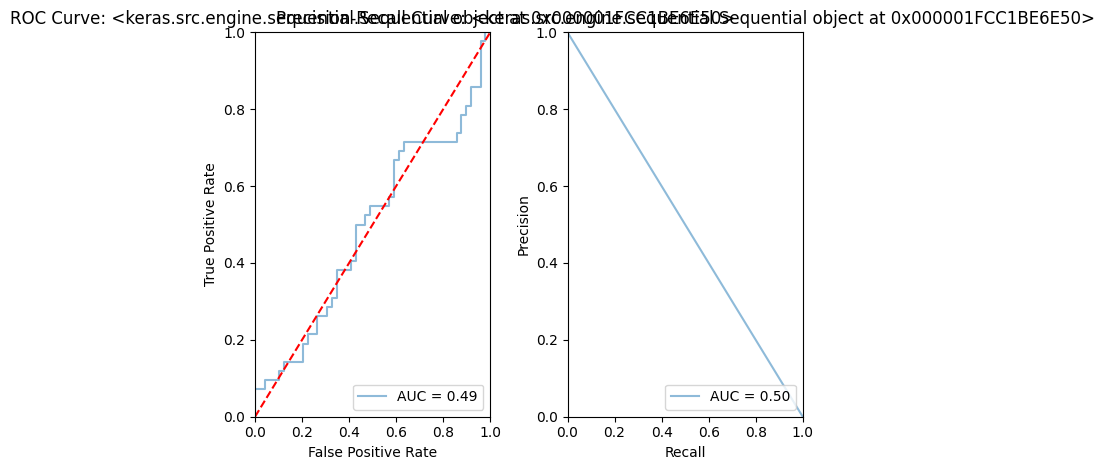

0.5


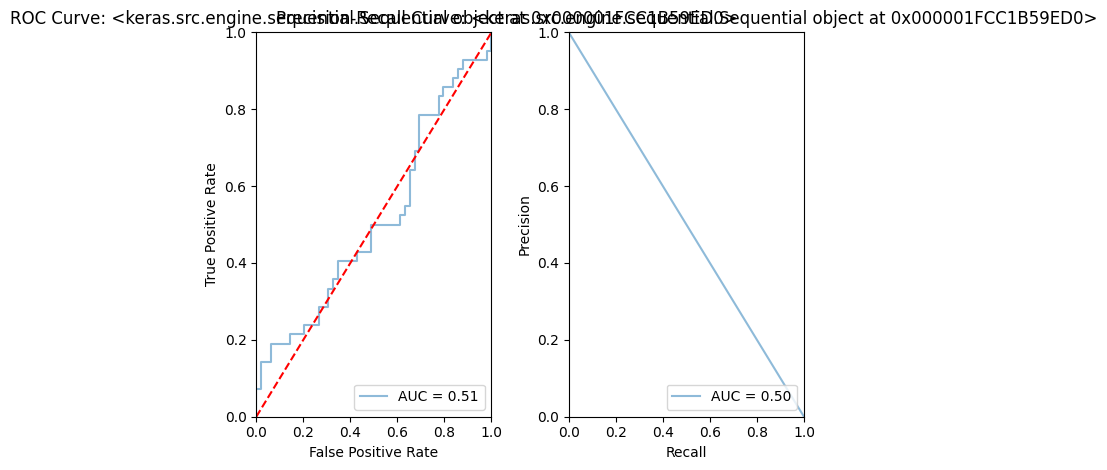

0.5


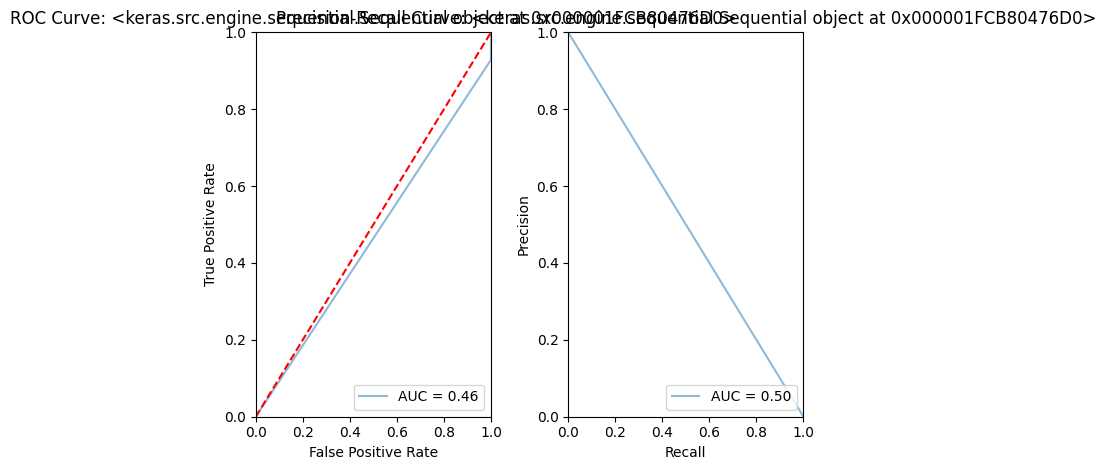

0.5


In [185]:
print(get_metrics(relu_Predict, y_test_with_all_value_1_or_2, model_Relu))
print(get_metrics(leakyRelu_Predict, y_test_with_all_value_1_or_2, model_LeakyRelu))
print(get_metrics(sigmoid_Predict, y_test_with_all_value_1_or_2, model_Sigmoid))